# Animal path to use in a Blender illustration of the recording protocol

In [1]:
%load_ext autoreload
%autoreload 2
%run ../setup_project.py
import os.path
import shutil

In [2]:
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath="/adata/projects/autopi_mec",dlcModelPath="/adata/models")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /adata/projects/autopi_mec
dlcModelPath: /adata/models
Reading /adata/projects/autopi_mec/sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


In [3]:
ses = sSessions[11]

In [4]:
ses.load_parameters_from_files() 
ap = Animal_pose(ses)
ap.pose_file_extension = ".pose.npy" # This means that the ap will always load from this extension
ap.load_pose_from_file()


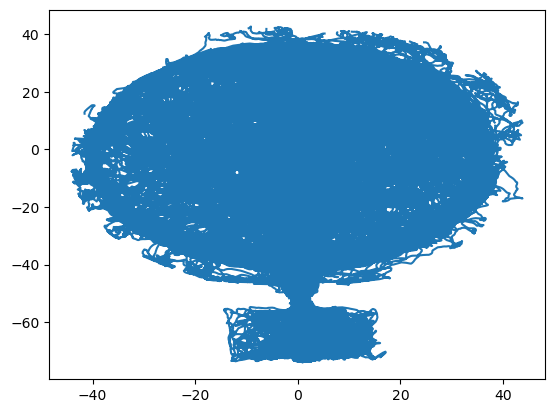

In [5]:

plt.plot(ap.pose[:,1],ap.pose[:,2])

/adata/projects/autopi_mec/results/circ80_0_path.pdf
/adata/projects/autopi_mec/results/autopi_0_path.pdf
/adata/projects/autopi_mec/results/circ80_1_path.pdf


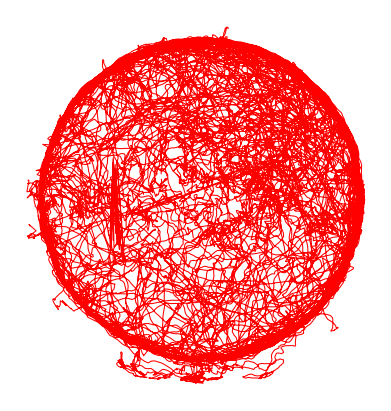

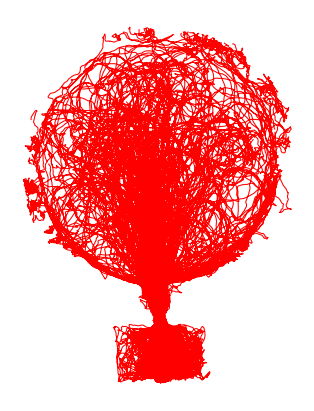

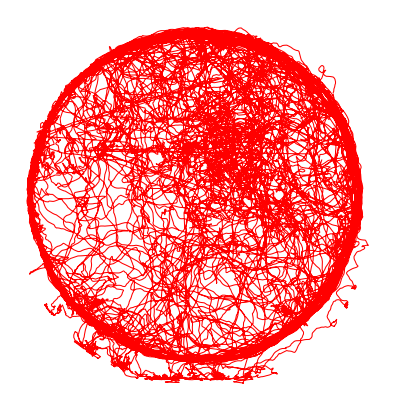

In [6]:
for environment, trialNo in zip(["circ80","autopi","circ80"],[0,0,1]):
    trialCode = "{}_{}".format(environment,trialNo)
    sesTrials = ses.session_environment_trial_data_frame()
    envInter = np.array([[sesTrials[sesTrials.trialCode==trialCode].startTime.item(),sesTrials[sesTrials.trialCode==trialCode].endTime.item()]])
    envInter
    ap.set_intervals(envInter)

    rowSize,colSize= (4,4)
    nPlots=1
    fig = plt.figure(figsize=(nPlots*colSize, 1*rowSize), constrained_layout=True) # create a figure
    spec = fig.add_gridspec(ncols=nPlots, nrows=1) # create a GridSpec object to a figure
    ax = fig.add_subplot(spec[0]) # add an axes to the figure
    ax.plot(ap.pose[:,1],ap.pose[:,2],color="red", alpha=1, linewidth=0.75)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    
    fn = myProject.dataPath+"/results/"+trialCode+"_path.pdf"
    print(fn)
    plt.savefig(fn)

## Example of a trial divided by trial phase (search, lever press, homing, reward)


In [7]:
prepareSessionsForSpatialAnalysisProject(sSessions,myProject.sessionList) ### sSeslist >>>> sSessions

Loading Animal_pose and Spike_train, sSes.ap and sSes.cg
Will load .pose.npy


100%|███████████████████████████████████████████| 90/90 [01:24<00:00,  1.06it/s]


Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


In [8]:
sSes = sSessions[11]
ses = myProject.sessionList[11]

In [9]:
t=6
oneTrialInter = ses.intervalDict["dark"][(t-1):t,:]
print(oneTrialInter)
oneTrialSearch = np.array([[3586.0,3595.0]])
oneTrialPress = np.array([[3586.0,3601.0]])
oneTrialHoming = np.array([[3586.0,3605.0]])


[[3586.02032901 3611.53109181]]


/adata/projects/autopi_mec/results/singleTrial_0_path.pdf
/adata/projects/autopi_mec/results/singleTrial_1_path.pdf
/adata/projects/autopi_mec/results/singleTrial_2_path.pdf
/adata/projects/autopi_mec/results/singleTrial_3_path.pdf


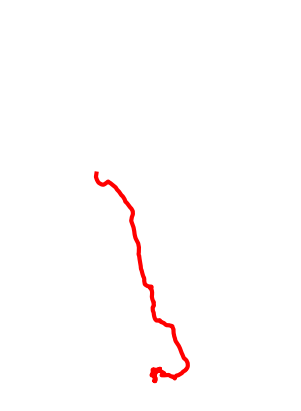

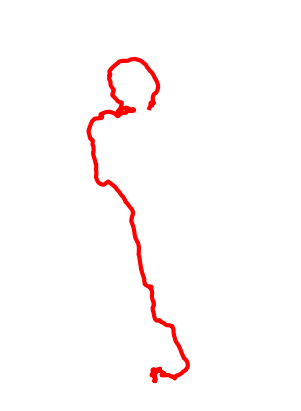

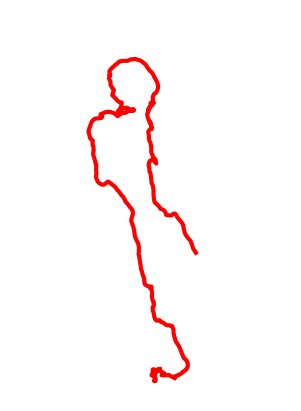

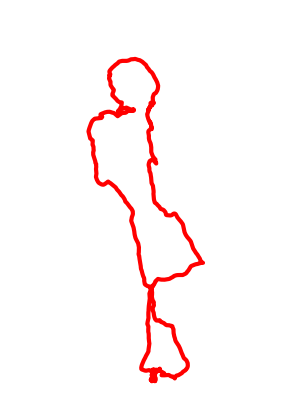

In [11]:
for i,myInt in enumerate([oneTrialSearch, oneTrialPress, oneTrialHoming,oneTrialInter]):

    ap.set_intervals(myInt)

    x = np.linspace(0,2*np.pi,100)
    X = np.cos(x)*40
    Y = np.sin(x)*40



    rowSize,colSize= (4,4)
    nPlots=1
    fig = plt.figure(figsize=(nPlots*colSize, 1*rowSize), constrained_layout=True) # create a figure
    spec = fig.add_gridspec(ncols=nPlots, nrows=1) # create a GridSpec object to a figure
    ax = fig.add_subplot(spec[0]) # add an axes to the figure
    ax.plot(ap.pose[:,1],ap.pose[:,2],color="red", alpha=1, linewidth=3)
    #ax.plot(X,Y,color="gray")
    ax.set_xlim(-45,45)
    ax.set_ylim(-80,45)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')

    fn = myProject.dataPath+"/results/"+ f"singleTrial_{i}" +"_path.pdf"
    print(fn)
    plt.savefig(fn)